<a href="https://colab.research.google.com/github/Lufec/Car_Plate_Digits_YOLOv5/blob/main/3_RetornaIMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Placas')

In [ ]:
!cp /content/gdrive/MyDrive/Placas/labels-predicao.zip /content/
!cp /content/gdrive/MyDrive/Placas/testing.zip /content/

In [ ]:
os.chdir('/content')
!mkdir labels-predicao
!mkdir testing

In [ ]:
!unzip /content/labels-predicao.zip -d /content/labels-predicao
!unzip /content/testing.zip -d /content/testing

Archive:  /content/labels-predicao.zip
  inflating: /content/labels-predicao/labels/Track99[11].txt  
  inflating: /content/labels-predicao/labels/Track99[12].txt  
  inflating: /content/labels-predicao/labels/Track4[13].txt  
  inflating: /content/labels-predicao/labels/Track40[11].txt  
  inflating: /content/labels-predicao/labels/Track7[14].txt  
  inflating: /content/labels-predicao/labels/Track101[11].txt  
  inflating: /content/labels-predicao/labels/Track34[13].txt  
  inflating: /content/labels-predicao/labels/Track16[14].txt  
  inflating: /content/labels-predicao/labels/Track15[12].txt  
  inflating: /content/labels-predicao/labels/Track89[14].txt  
  inflating: /content/labels-predicao/labels/Track80[12].txt  
  inflating: /content/labels-predicao/labels/Track64[12].txt  
  inflating: /content/labels-predicao/labels/Track42[12].txt  
  inflating: /content/labels-predicao/labels/Track51[13].txt  
  inflating: /content/labels-predicao/labels/Track37[06].txt  
  inflating: /con

In [ ]:
import glob
images = glob.glob('/content/testing/images' + '/*.png')
true_labels = glob.glob('/content/testing/labels' + '/*.txt')
pred_labels = glob.glob('/content/labels-predicao/labels'+'/*.txt')

In [ ]:
images = sorted(images)
true_labels = sorted(true_labels)
pred_labels = sorted(pred_labels)

In [ ]:
images[0]

'/content/testing/images/Track100[11].png'

In [ ]:
with open('/content/testing/labels/Track100[11].txt') as t:
  lines = t.readlines()

In [ ]:
print(lines[0])

7 0.0975609756097561 0.6341463414634146 0.11382113821138211 0.5365853658536586



In [ ]:
classes = {
    '0':'A','1':'B','2':'C','3':'D','4':'E','5':'F','6':'G','7':'H','8':'I',
    '9':'J','10':'K','11':'L','12':'M','13':'N','14':'O','15':'P','16':'Q',
    '17':'R','18':'S','19':'T','20':'U','21':'V','22':'W','23':'X','24':'Y','25':'Z',
    '26':'0','27':'1','28':'2','29':'3','30':'4','31':'5','32':'6','33':'7','34':'8','35':'9'
}

In [ ]:
imgs_placas = []

for i in range(len(images)):
  
  with open(true_labels[i]) as t:
    lines_true = t.readlines()

  with open(pred_labels[i]) as t:
    lines_pred = t.readlines()
  
  classes_true = []
  classes_pred = []
  letras = []
  letras_true = []
  letras_pred = []
  letras.append(images[i])
  for j in range(len(lines_true)):
    param = {}
    splited = lines_true[j].split()
    param["class_true"] = splited[0]
    param["x"] = float(splited[1])
    param["y"] = float(splited[2])
    param["w"] = float(splited[3])
    param["h"] = float(splited[4])
    letras_true.append(param)

  for j in range(len(lines_pred)):
    param = {}
    splited = lines_pred[j].split()
    param["class_pred"] = splited[0]
    param["x"] = float(splited[1])
    param["y"] = float(splited[2])
    param["w"] = float(splited[3])
    param["h"] = float(splited[4])
    param["c"] = float(splited[5])
    letras_pred.append(param)
  newlist = sorted(letras_pred, key=lambda k: k['x']) 
  letras.append(letras_true)
  letras.append(newlist)
  imgs_placas.append(letras)
  


In [ ]:
imgs_placas[0][0]

'/content/testing/images/Track100[11].png'

In [ ]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
objPlacas = copy.deepcopy(imgs_placas)
for i in range(len(imgs_placas)):
  objPlacas[i][0] = cv2.imread(imgs_placas[i][0])
  objPlacas[i][0] = objPlacas[i][0][:,:,::-1]
  
  h_placa,w_placa,_ = objPlacas[i][0].shape 
  for j in range(len(imgs_placas[0][1])):  #true labels
  #desnormalizar
    x = objPlacas[i][1][j]['x']*w_placa
    y = objPlacas[i][1][j]['y']*h_placa
    w = objPlacas[i][1][j]['w']*w_placa
    h = objPlacas[i][1][j]['h']*h_placa
    
    #rearranja pontos para plotar, ponto superior esquerdo
    x = int(x - (w/2))
    y = int(y - (h/2))
    w = int(w)
    h = int(h)
    
    objPlacas[i][1][j]['x'] = x
    objPlacas[i][1][j]['y'] = y
    objPlacas[i][1][j]['w'] = w
    objPlacas[i][1][j]['h'] = h
    objPlacas[i][1][j]['class_true'] = classes[objPlacas[i][1][j]['class_true']]

  for j in range(len(imgs_placas[i][2])):  #pred labels
  #desnormalizar
    x = objPlacas[i][2][j]['x']*w_placa
    y = objPlacas[i][2][j]['y']*h_placa
    w = objPlacas[i][2][j]['w']*w_placa
    h = objPlacas[i][2][j]['h']*h_placa
    
    #rearranja pontos para plotar, ponto superior esquerdo
    x = int(x - (w/2))
    y = int(y - (h/2))
    w = int(w)
    h = int(h)
    
    objPlacas[i][2][j]['x'] = x
    objPlacas[i][2][j]['y'] = y
    objPlacas[i][2][j]['w'] = w
    objPlacas[i][2][j]['h'] = h
    objPlacas[i][2][j]['class_pred'] = classes[objPlacas[i][2][j]['class_pred']]
   
  if len(objPlacas[i][2]) > 7 :
    for j in range(len(objPlacas[i][2])):
      for k in range(len(objPlacas[i][2])):
        if j == k:
          continue
        if len(objPlacas[i][2]) == 7:
          break
        bx1 = objPlacas[i][2][j]['x']
        by1 = objPlacas[i][2][j]['y']
        bw = objPlacas[i][2][j]['w']
        bh = objPlacas[i][2][j]['h']
        bx2 = bx1+bw
        by2 = by1+bh
        boxP = [bx1,by1,bx2,by2]

        bx1 = objPlacas[i][2][k]['x']
        by1 = objPlacas[i][2][k]['y']
        bw = objPlacas[i][2][k]['w']
        bh = objPlacas[i][2][k]['h']
        bx2 = bx1+bw
        by2 = by1+bh
        boxT = [bx1,by1,bx2,by2]
        IoU =  bb_intersection_over_union(boxT, boxP)
        if IoU > 0.5:
          print('Duplicata em  ',i,', caracteres ',j, ' e ',k)
          conf1 = objPlacas[i][2][j]['c']
          conf2 = objPlacas[i][2][k]['c']
          if conf1 > conf2:
            del objPlacas[i][2][k]
          else:
            del objPlacas[i][2][j]
    

Duplicata em   89 , caracteres  0  e  1
Duplicata em   90 , caracteres  0  e  1


In [ ]:
objPlacas[0][1]

[{'class_true': 'H', 'h': 28, 'w': 18, 'x': 6, 'y': 19},
 {'class_true': 'L', 'h': 29, 'w': 18, 'x': 26, 'y': 18},
 {'class_true': 'X', 'h': 28, 'w': 19, 'x': 44, 'y': 19},
 {'class_true': '0', 'h': 27, 'w': 19, 'x': 74, 'y': 19},
 {'class_true': '4', 'h': 28, 'w': 16, 'x': 94, 'y': 18},
 {'class_true': '4', 'h': 28, 'w': 18, 'x': 113, 'y': 18},
 {'class_true': '1', 'h': 28, 'w': 6, 'x': 139, 'y': 18}]

In [ ]:
objPlacas[0][2]

[{'c': 1.0, 'class_pred': 'H', 'h': 28, 'w': 18, 'x': 6, 'y': 19},
 {'c': 1.0, 'class_pred': 'L', 'h': 29, 'w': 18, 'x': 26, 'y': 18},
 {'c': 1.0, 'class_pred': 'X', 'h': 28, 'w': 19, 'x': 44, 'y': 19},
 {'c': 1.0, 'class_pred': '0', 'h': 27, 'w': 19, 'x': 74, 'y': 19},
 {'c': 1.0, 'class_pred': '4', 'h': 28, 'w': 16, 'x': 94, 'y': 18},
 {'c': 1.0, 'class_pred': '4', 'h': 28, 'w': 18, 'x': 113, 'y': 18},
 {'c': 1.0, 'class_pred': '1', 'h': 28, 'w': 6, 'x': 139, 'y': 18}]

In [ ]:
imTrue = []
for i in range(len(objPlacas)):
  im_i = copy.deepcopy(objPlacas[i][0])
  for j in range(len(objPlacas[i][1])):
    bx1 = objPlacas[i][1][j]['x']
    by1 = objPlacas[i][1][j]['y']
    bw = objPlacas[i][1][j]['w']
    bh = objPlacas[i][1][j]['h']
    bx2 = bx1+bw
    by2 = by1+bh
    cv2.rectangle(im_i, (bx1,by1), (bx2,by2), (255,255,0), 1)
    cv2.putText(im_i, objPlacas[i][1][j]['class_true'], (int(bx1), int(by1-3)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,0), 1)
  imTrue.append(im_i)

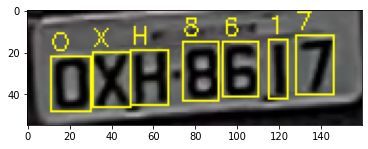

In [ ]:
plt.imshow(imTrue[25])

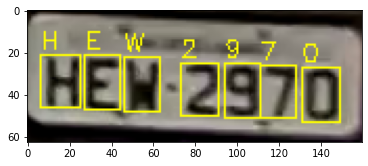

In [ ]:
plt.imshow(imTrue[2])

In [ ]:
imPred = []
for i in range(len(objPlacas)):
  im_i = copy.deepcopy(imTrue[i])
  for j in range(len(objPlacas[i][2])):
    bx1 = objPlacas[i][2][j]['x']
    by1 = objPlacas[i][2][j]['y']
    bw = objPlacas[i][2][j]['w']
    bh = objPlacas[i][2][j]['h']
    bx2 = bx1+bw
    by2 = by1+bh
    cv2.rectangle(im_i, (int(bx1),int(by1)), (int(bx2),int(by2)), (0, 0, 255), 1)
    cv2.putText(im_i, objPlacas[i][2][j]['class_pred'], (int(bx1), int(by2+8)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
  imPred.append(im_i)

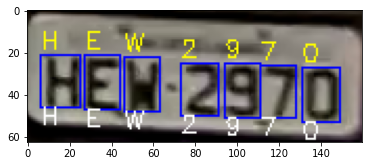

In [ ]:
plt.imshow(imPred[2])

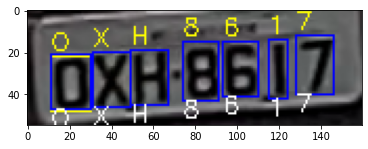

In [ ]:
plt.imshow(imPred[25])

In [ ]:
len(objPlacas[0][1])

7

In [ ]:
IoU = []
for i in range(len(objPlacas)):
  IoU_letra = []
  for j in range(len(objPlacas[i][1])):
     bx1 = objPlacas[i][2][0]['x']
     by1 = objPlacas[i][2][0]['y']
     bw = objPlacas[i][2][0]['w']
     bh = objPlacas[i][2][0]['h']
     bx2 = bx1+bw
     by2 = by1+bh
     boxP = [bx1,by1,bx2,by2]

     bx1 = objPlacas[i][1][0]['x']
     by1 = objPlacas[i][1][0]['y']
     bw = objPlacas[i][1][0]['w']
     bh = objPlacas[i][1][0]['h']
     bx2 = bx1+bw
     by2 = by1+bh
     boxT = [bx1,by1,bx2,by2]
     IoU_letra.append(bb_intersection_over_union(boxT, boxP))
  IoU.append(IoU_letra)

In [ ]:
IoU

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9285714285714286,
  0.9285714285714286,
  0.92

In [ ]:
acertos = []
for i in range(len(objPlacas)):
  acertos_placa = []
  for j in range(len(objPlacas[i][1])):
    true_class = objPlacas[i][1][j]['class_true']
    pred_class = objPlacas[i][2][j]['class_pred']
    acertos_placa.append(true_class == pred_class)
  acertos.append(acertos_placa)

In [ ]:
acertos

[[True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True],
 [True, Tr

In [ ]:
IoU_placa = []
acerto_placa = []

for i in range(len(objPlacas)):
  IoU_val = 0
  acerto_val = 0
  for j in range(7):
    IoU_val += IoU[i][j]
    if acertos[i][j]:
      acerto_val+=1
  IoU_val = IoU_val/7
  acerto_val = acerto_val/7
  IoU_placa.append(IoU_val)
  acerto_placa.append(acerto_val)

In [ ]:
contIoU = 0
indIoUDif = []
contAc = 0
indAcDif = []
for i in range(len(IoU_placa)):
  if IoU_placa[i] != 1:
    contIoU +=1
    indIoUDif.append(i)

for i in range(len(acerto_placa)):
  if acerto_placa[i] != 1:
     contAc +=1
     indAcDif.append(i)

print(contIoU)
print(indIoUDif)
print(contAc)
print(indAcDif)

5
[25, 75, 90, 102, 203]
0
[]


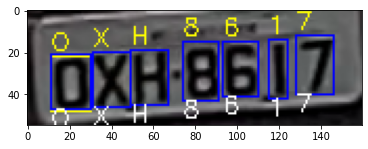

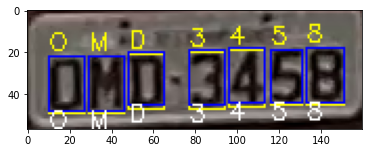

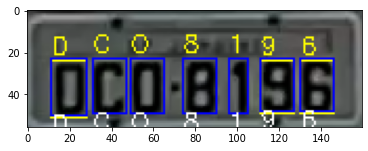

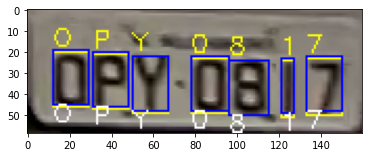

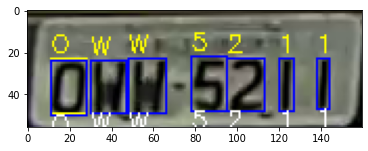

In [ ]:
plt.figure()
plt.imshow(imPred[25])
plt.figure()
plt.imshow(imPred[75])
plt.figure()
plt.imshow(imPred[90])
plt.figure()
plt.imshow(imPred[102])
plt.figure()
plt.imshow(imPred[203])

In [ ]:
mAP_placa = []

for i in range(len(objPlacas)):
  AP = IoU_placa[i]*acerto_placa[i]
  mAP_placa.append(AP)

In [ ]:
mAP_placa

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9285714285714287,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9642857142857143,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9310344827586208,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9285714285714287,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [ ]:
mAP = sum(mAP_placa)/len(mAP_placa)
print(mAP)

0.9985760467980295


In [ ]:
os.chdir('/content/imgs_pred')

In [ ]:
for i in range(len(imPred)):
  my_string = imgs_placas[i][0] 
  filename = my_string.split('content/testing/images/',1)[1]
  cv2.imwrite(filename,imPred[i])

In [ ]:
os.chdir('/content')

In [ ]:
import shutil
shutil.make_archive('imgs_pred', 'zip', 'imgs_pred')

'/content/imgs_pred.zip'